In [1]:
import pandas as pd #Veri setlerini okuma, temizleme ve analiz etme yeteneği sağlar.
import numpy as np #Pandas ile birlikte, hızlı ve verimli hesaplamalar için temel oluşturur.

try:
    df_weather = pd.read_csv("munich.csv")
    print("--- df_weather İlk 5 Satir ---")
    print(df_weather.head())
    print("\n--- df_weather Veri Tipi Bilgisi ---")
    df_weather.info()

except FileNotFoundError:
    print("HATA: 'munich.csv' dosyasi bulunamadi. Lutfen dosya adini ve yolunu kontrol edin.")

--- df_weather İlk 5 Satir ---
  time;precipitation_sum (mm);snowfall_sum (cm)
0                            2024-03-01;NaN;NaN
1                            2024-03-02;NaN;NaN
2                            2024-03-03;NaN;NaN
3                            2024-03-04;NaN;NaN
4                            2024-03-05;NaN;NaN

--- df_weather Veri Tipi Bilgisi ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 1 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   time;precipitation_sum (mm);snowfall_sum (cm)  153 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


In [2]:
# Ayiriciyi noktalı virgul (;) olarak belirterek veriyi yeniden yukleme
df_weather = pd.read_csv("munich.csv", sep=';')
#veri dosyalarında sütunları ayırmak için noktalı virgül (;) tercih edilir.
print("--- df_weather Yeniden Yükleme Sonrasi İlk 5 Satir ---")
print(df_weather.head())
print("\n--- df_weather Yeniden Yükleme Sonrasi Veri Tipi Bilgisi ---")
df_weather.info()

--- df_weather Yeniden Yükleme Sonrasi İlk 5 Satir ---
         time  precipitation_sum (mm)  snowfall_sum (cm)
0  2024-03-01                     NaN                NaN
1  2024-03-02                     NaN                NaN
2  2024-03-03                     NaN                NaN
3  2024-03-04                     NaN                NaN
4  2024-03-05                     NaN                NaN

--- df_weather Yeniden Yükleme Sonrasi Veri Tipi Bilgisi ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    153 non-null    object 
 1   precipitation_sum (mm)  134 non-null    float64
 2   snowfall_sum (cm)       134 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.7+ KB


In [3]:
# 'time' sütununu object tipinden datetime tipine dönüstürme
df_weather['time'] = pd.to_datetime(df_weather['time'])
print("df_weather (datetime dönüsümü sonrasi):")
df_weather.info()

df_weather (datetime dönüsümü sonrasi):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   time                    153 non-null    datetime64[ns]
 1   precipitation_sum (mm)  134 non-null    float64       
 2   snowfall_sum (cm)       134 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 3.7 KB


In [4]:
# Eksik (NaN) degerleri 0 ile doldurma (0 mm yagis/kar yagisi oldugu varsayimiyla)
df_weather['precipitation_sum (mm)'].fillna(0, inplace=True)
df_weather['snowfall_sum (cm)'].fillna(0, inplace=True)

print("df_weather (eksik veri isleme sonrasi):")
df_weather.info()

df_weather (eksik veri isleme sonrasi):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   time                    153 non-null    datetime64[ns]
 1   precipitation_sum (mm)  153 non-null    float64       
 2   snowfall_sum (cm)       153 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 3.7 KB


C:\Users\MSI\AppData\Local\Temp\ipykernel_4656\2755075110.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_weather['precipitation_sum (mm)'].fillna(0, inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_4656\2755075110.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [ ]:
# Yagis ve kar yagisi sutunlarinin temel istatistiklerini hesaplama
print("Yagis ve Kar Yagisi Istatistikleri:")
print(df_weather[['precipitation_sum (mm)', 'snowfall_sum (cm)']].describe()) #describe()->sayısal (numeric) sütunların istatistiksel özetini tek bir tablo halinde sunar.

Yagis ve Kar Yagisi Istatistikleri:
       precipitation_sum (mm)  snowfall_sum (cm)
count              153.000000         153.000000
mean                 3.438562           0.016275
std                  8.372882           0.106059
min                  0.000000           0.000000
25%                  0.000000           0.000000
50%                  0.300000           0.000000
75%                  4.100000           0.000000
max                 78.400000           1.010000


In [11]:
# 1. 'time' sütunundan ay bilgisini (month) çıkarma
df_weather['month'] = df_weather['time'].dt.month

# 2. Her ay icin yagis ve kar yagisi ortalamalarini hesaplama
monthly_avg = df_weather.groupby('month').agg(
    ortalama_yagis=('precipitation_sum (mm)', 'mean'),
    ortalama_kar=('snowfall_sum (cm)', 'mean')
).reset_index()

print("\nAylik Ortalama Yagis ve Kar Yagisi:")
print(monthly_avg)


Aylik Ortalama Yagis ve Kar Yagisi:
   month  ortalama_yagis  ortalama_kar
0      3        0.964516      0.032903
1      4        2.403333      0.049000
2      5        5.825806      0.000000
3      6        5.233333      0.000000
4      7        2.790323      0.000000


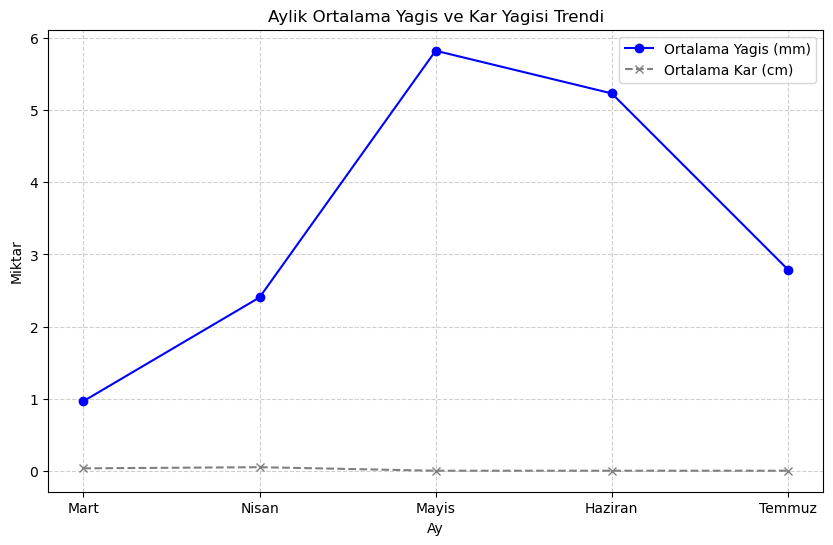

In [15]:
import matplotlib.pyplot as plt

# Ay numaralarini ay isimlerine cevirelim 
ay_isimleri = {3: 'Mart', 4: 'Nisan', 5: 'Mayis', 6: 'Haziran', 7: 'Temmuz'}
monthly_avg['Ay Adi'] = monthly_avg['month'].map(ay_isimleri)

plt.figure(figsize=(10, 6))

# Ortalama Yagis Cizgisi
plt.plot(monthly_avg['Ay Adi'], monthly_avg['ortalama_yagis'], 
         marker='o', linestyle='-', color='blue', label='Ortalama Yagis (mm)')

# Ortalama Kar Yagisi Cizgisi
plt.plot(monthly_avg['Ay Adi'], monthly_avg['ortalama_kar'], 
         marker='x', linestyle='--', color='gray', label='Ortalama Kar (cm)')

plt.title('Aylik Ortalama Yagis ve Kar Yagisi Trendi')
plt.xlabel('Ay')
plt.ylabel('Miktar')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('aylik_yagis_trend.png', dpi=300)
plt.show()

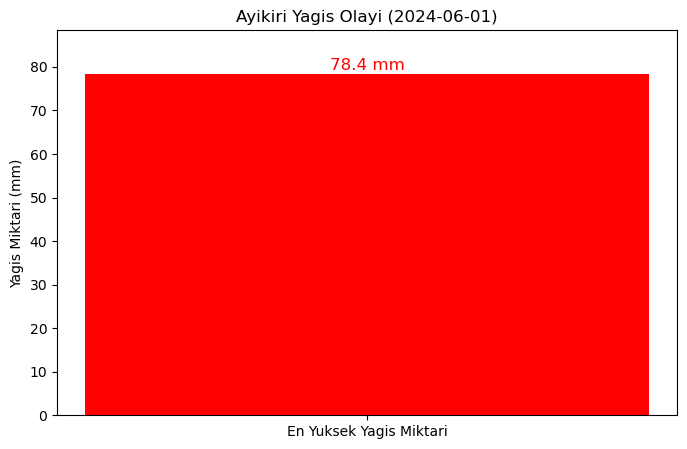

In [16]:
# Maksimum yagisi bulma
max_yagis_gunu = df_weather.loc[df_weather['precipitation_sum (mm)'].idxmax()]

# Gorsellestirme icin tarih ve miktar
tarih = max_yagis_gunu['time']
miktar = max_yagis_gunu['precipitation_sum (mm)']

plt.figure(figsize=(8, 5))
plt.bar(['En Yuksek Yagis Miktari'], [miktar], color='red')

plt.title(f'Ayikiri Yagis Olayi ({tarih.strftime("%Y-%m-%d")})')
plt.ylabel('Yagis Miktari (mm)')
plt.ylim(0, miktar + 10) # Grafiği daha iyi göstermek için y eksenini ayarlama
plt.text(0, miktar + 1, f'{miktar} mm', ha='center', color='red', fontsize=12) # Degeri grafiğe yazma
plt.savefig('aykiri_yagis_olayi.png', dpi=300)
plt.show()